In [17]:
"""
     *Student Name: Furkan Yasir Göksu 
     *Student ID : 150230723
"""

'\n     *Student Name: Furkan Yasir Göksu \n     *Student ID : 150230723\n'

**Data**

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

import pandas as pd
df = pd.read_csv("lotr_relationships.csv")

**1.1 Introduction**

In [19]:
G_all = nx.from_pandas_edgelist(df, 'Character1', 'Character2',['Relationship'])


In [20]:
# Displaying descriptive information about the dataset

# Displaying data types of each column
print("\nData Types:")
print(df.dtypes)

print("Dataset Information:")
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
print("Columns:", list(df.columns))



# Statistical summary for numerical columns
print("\nNumerical Summary:")
print(df.describe())

# Identifying unique values
print("\nCategorical Variables:")
for col in df.select_dtypes(include='object').columns:
    unique_values = df[col].unique()
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"Total Unique Values: {unique_count}")
    
    print("Unique Values:")
    for val in unique_values:
        print(val)



Data Types:
Character1      object
Character2      object
Relationship    object
dtype: object
Dataset Information:
Total Rows: 162
Total Columns: 3
Columns: ['Character1', 'Character2', 'Relationship']

Numerical Summary:
           Character1        Character2 Relationship
count             162               162          162
unique             17                23            3
top     Frodo Baggins  Gríma Wormtongue   Friendship
freq               22                13          108

Categorical Variables:

Character1:
Total Unique Values: 17
Unique Values:
Frodo Baggins
Samwise Gamgee
Gandalf
Aragorn
Legolas
Gimli
Boromir
Meriadoc Brandybuck
Peregrin Took
Saruman
Gollum
Galadriel
Arwen
Éomer
Éowyn
Théoden
Faramir

Character2:
Total Unique Values: 23
Unique Values:
Samwise Gamgee
Gandalf
Aragorn
Legolas
Gimli
Boromir
Meriadoc Brandybuck
Peregrin Took
Saruman
Gollum
Galadriel
Elrond
Arwen
Éomer
Éowyn
Faramir
Denethor
Bilbo Baggins
Treebeard
Gríma Wormtongue
Radagast
Tom Bombadil
Théode

**1.2 Visualize the whole graph**

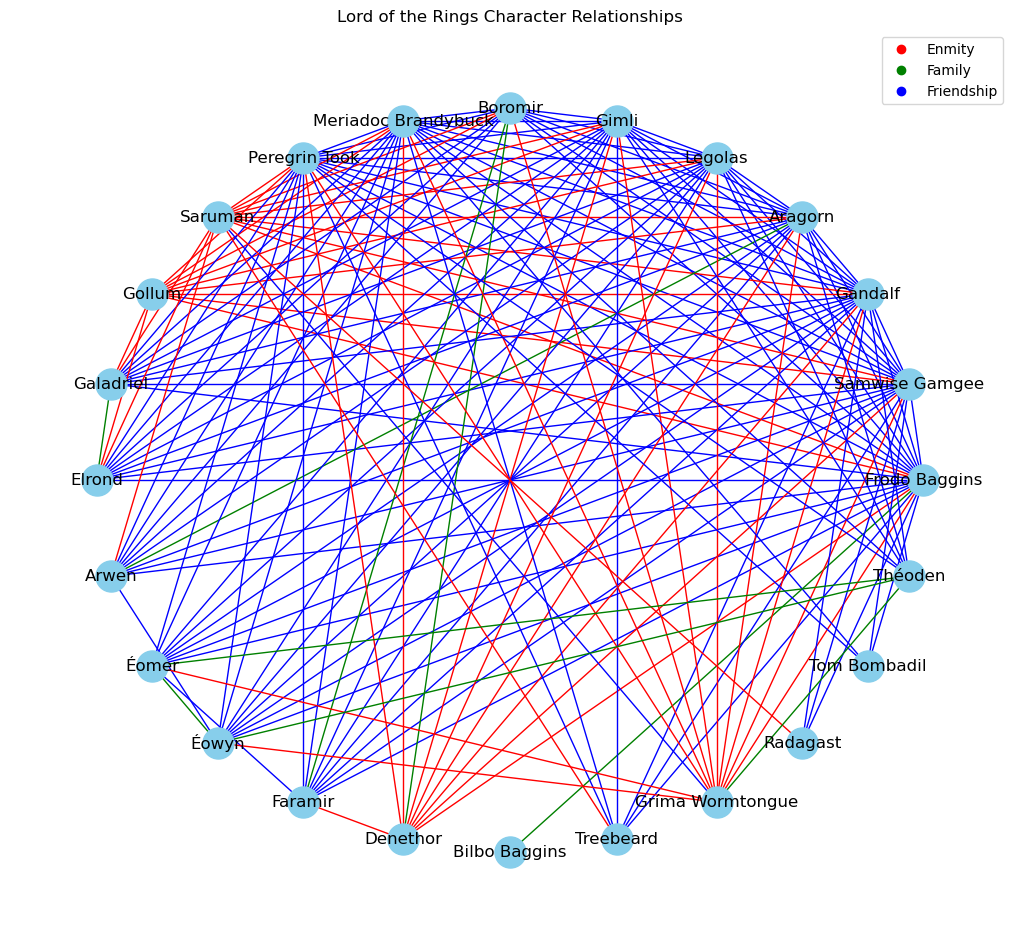

In [21]:
# Define edge colors based on relationship types
edgeColors = {
    "Enmity": "red",
    "Family": "green",
    "Friendship": "blue"
}

# Define positions for nodes in a circular layout
pos = nx.circular_layout(G_all)

# Assign colors to edges based on relationship types in the DataFrame
edge_colors_list = [edgeColors[df.loc[i, 'Relationship']] for i in df.index]

# Create the figure and draw the graph
plt.figure(figsize=(10, 9))
nx.draw(
    G_all,
    pos,
    with_labels=True,
    node_color='skyblue',
    node_size=500,
    edge_color=edge_colors_list
)

# Add a title to the plot
plt.title('Lord of the Rings Character Relationships')

# Create a legend for edge colors
legend_labels = {'Enmity': 'red', 'Family': 'green', 'Friendship': 'blue'}
legend_handles = [plt.Line2D([], [], color=color, marker='o', linestyle='', label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_handles)

# Display the plot
plt.show()

_This graphic depicts the relationships between the characters in "The Lord of the Rings" through a graph. The names of the characters are written next to each node in the graph, which represents them. Different edge colors indicate different types of relationships, such as friendship, family ties, or enmity. The connections (edges) between nodes represent the various relationships among characters. Clarity is provided by the accompanying legend, which explains the significance of each relationship type's unique color._

**1.3 Visualize relations**

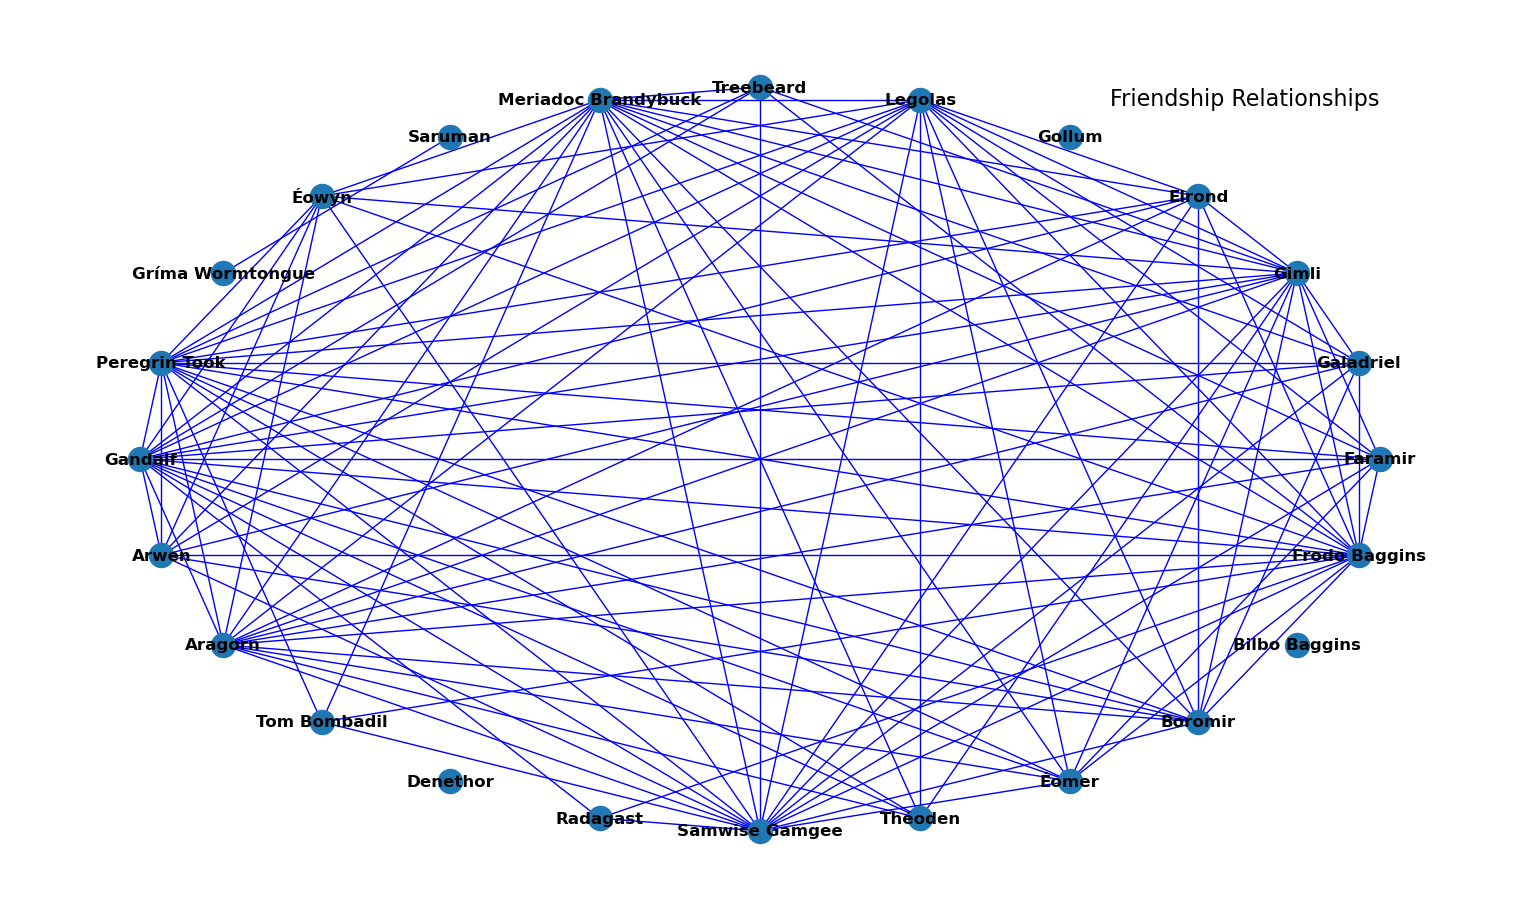

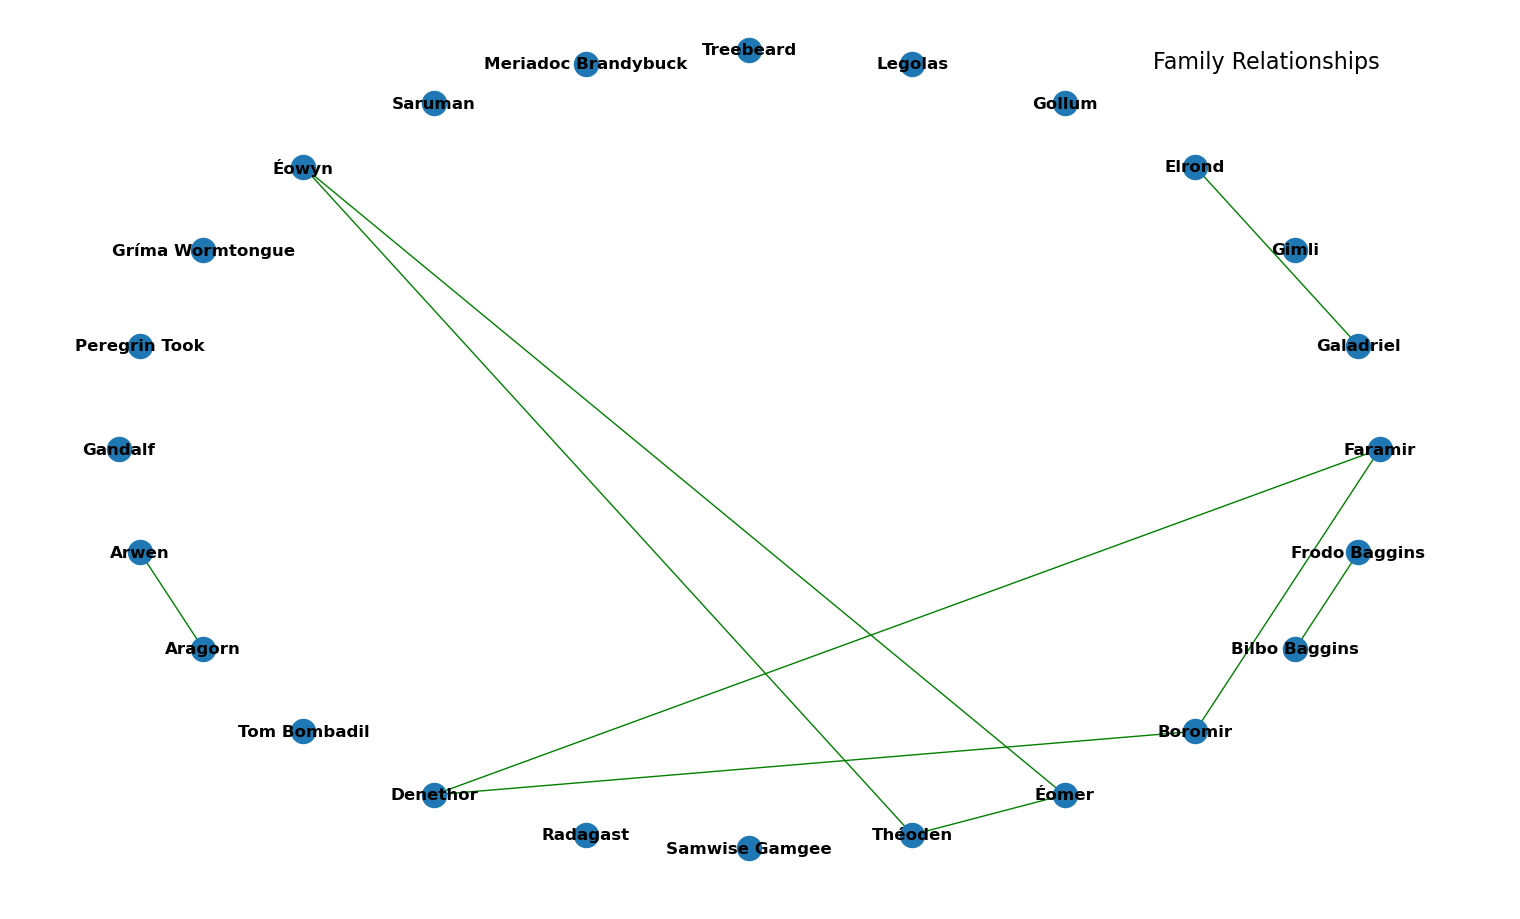

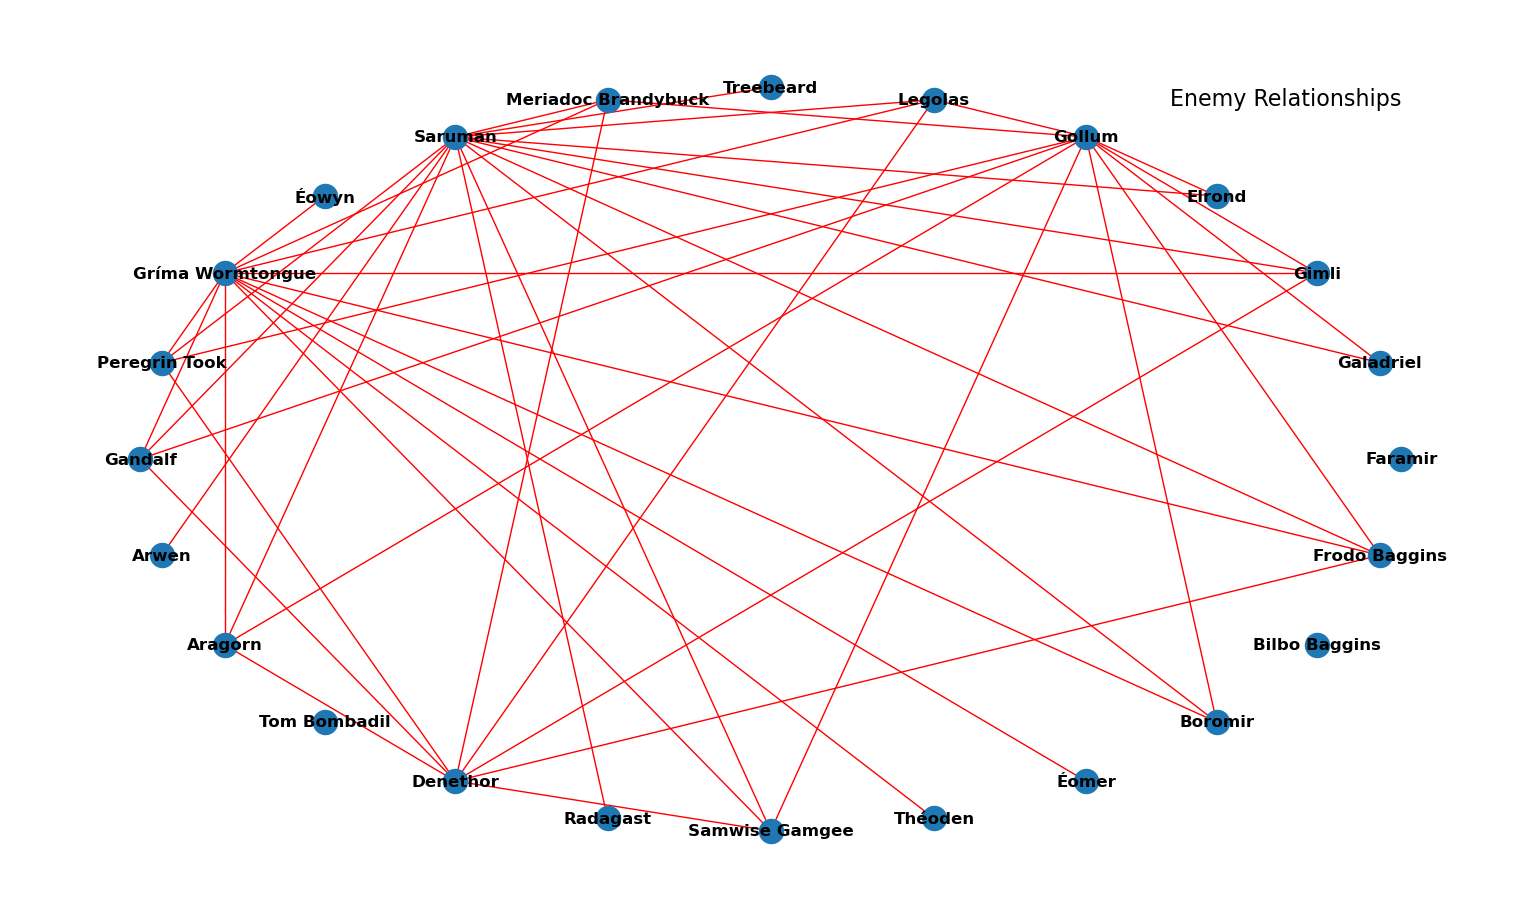

In [22]:

# Extracting relationships into separate lists based on types
all_relations = [
    [df.loc[i, "Character1"], df.loc[i, "Character2"]]
    for i in df.index
]

friend_relations = [
    [df.loc[i, "Character1"], df.loc[i, "Character2"]]
    for i in df.index
    if df.loc[i, "Relationship"] == "Friendship"
]

family_relations = [
    [df.loc[i, "Character1"], df.loc[i, "Character2"]]
    for i in df.index
    if df.loc[i, "Relationship"] == "Family"
]

enemy_relations = [
    [df.loc[i, "Character1"], df.loc[i, "Character2"]]
    for i in df.index
    if df.loc[i, "Relationship"] == "Enmity"
]

# Collecting all unique characters from the dataset
all_characters = set(df['Character1']).union(set(df['Character2']))

# Creating graphs for different relationship types
G_friendship = nx.Graph()
G_friendship.add_nodes_from(all_characters)
G_friendship.add_edges_from(friend_relations, relationship='Friendship')

G_family = nx.Graph()
G_family.add_nodes_from(all_characters)
G_family.add_edges_from(family_relations, relationship='Family')

G_enemy = nx.Graph()
G_enemy.add_nodes_from(all_characters)
G_enemy.add_edges_from(enemy_relations, relationship='Enemy')

# Plotting Friendship Relationships 
plt.figure(figsize=(15, 9))
pos = nx.circular_layout(G_friendship)
nx.draw(G_friendship, pos, with_labels=True, node_size=300, font_weight='bold', edge_color="blue")
plt.text(1, 1, 'Friendship Relationships', fontsize=16, ha='right', va='top')
plt.show()

# Plotting Family Relationships 
plt.figure(figsize=(15, 9))
pos = nx.circular_layout(G_family)
nx.draw(G_family, pos, with_labels=True, node_size=300, font_weight='bold', edge_color="green")
plt.text(1, 1, 'Family Relationships', fontsize=16, ha='right', va='top')
plt.show()

# Plotting Enemy Relationships 
plt.figure(figsize=(15, 9))
pos = nx.circular_layout(G_enemy)
nx.draw(G_enemy, pos, with_labels=True, node_size=300, font_weight='bold', edge_color="red")
plt.text(1, 1, 'Enemy Relationships', fontsize=16, ha='right', va='top')
plt.show()

**2.1 Degree distribution**

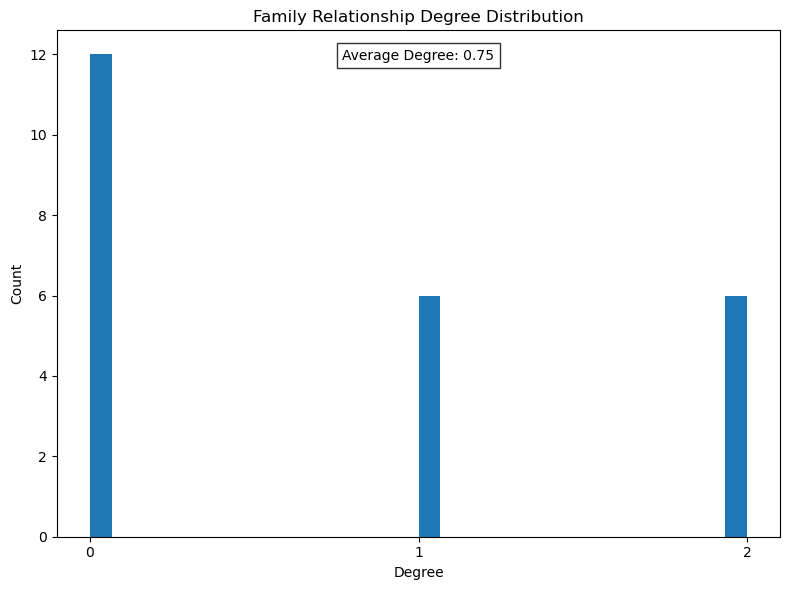

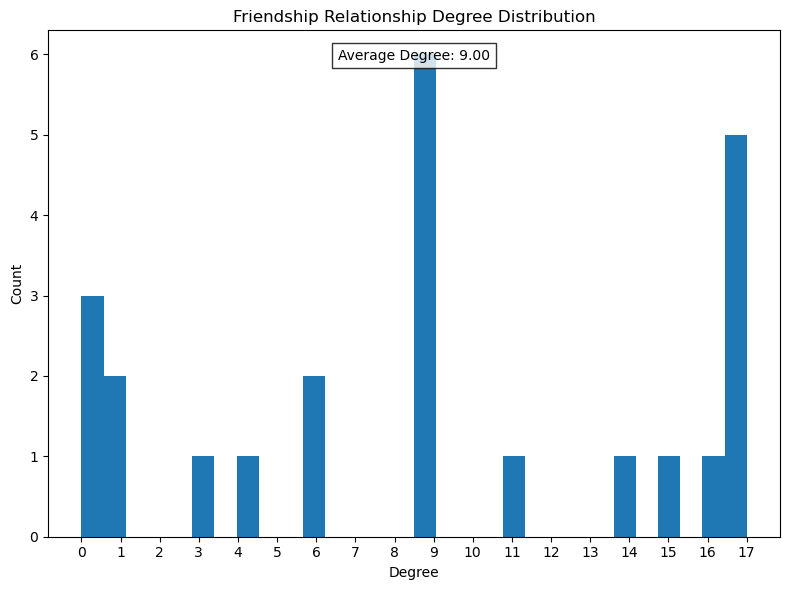

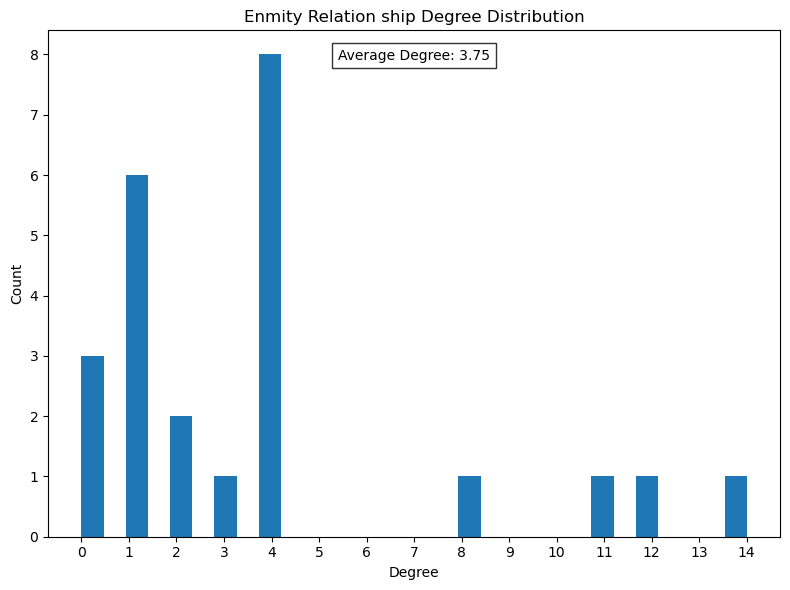

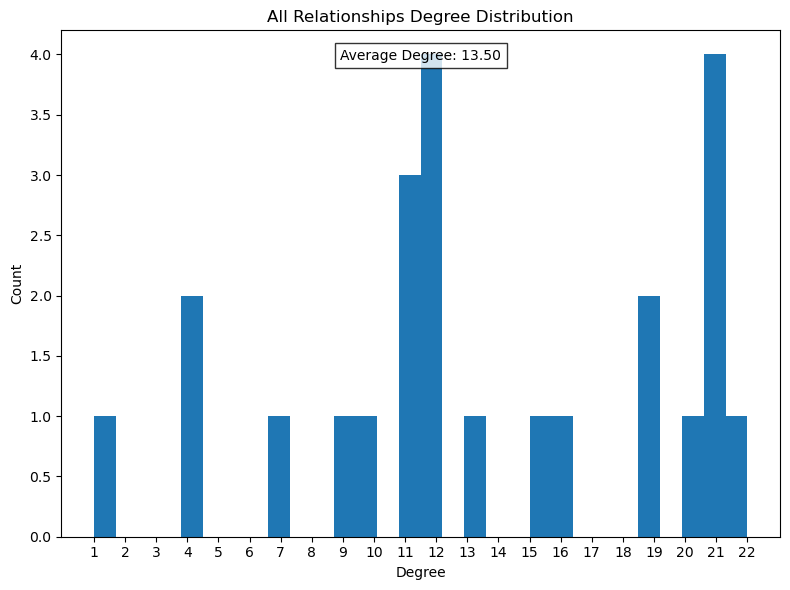

In [23]:

def plot_degree_dist(G, title):
    # Calculate degrees for nodes in the graph
    degrees = [G.degree(n) for n in G.nodes()]  
    avg_degree = sum(degrees) / len(G.nodes())
    
    
    # Plotting degree distribution
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=30)   
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title(title)
    
    # Adding average degree information as text on the plot
    plt.text(0.5, 0.95, f'Average Degree: {avg_degree:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    plt.xticks(range(min(degrees), max(degrees)+1))
    
    plt.tight_layout()
    plt.show()

#Distribution of node degrees in the family relationship graph.
plot_degree_dist(G_family, 'Family Relationship Degree Distribution')


#Distribution of node degrees in the friendship relationship graph.
plot_degree_dist(G_friendship, 'Friendship Relationship Degree Distribution')

#Distribution of node degrees in the enmity relationship graph.
plot_degree_dist(G_enemy, 'Enmity Relation ship Degree Distribution')

#Distribution of node degrees in the combined relationship graph.
plot_degree_dist(G_all, 'All Relationships Degree Distribution')


_Distinct patterns emerge when analyzing the degree distributions in the LOTR network between different relationship types and the network as a whole. Friendship, Enmity, and Family are relationship-specific histograms that illustrate social dynamics within each category and reveal differences in the concentration of social relationships. Insights into general social activity and complexity are provided by the computed average degrees for each connection type, which characterize the normal level of social interaction. Relationship types and the network as a whole are compared to highlight the contributions of individual relationships to the social fabric as a whole._

**2.2 Sub-graphs**

In [24]:

def check_connectedness(G, title):
    # Checking if the graph is fully connected
    if nx.is_connected(G):
        print(f"**{title}** is a fully connected graph.")
        largest_subgraph = G
        num_edges = len(G.edges)
        print(f"The largest subgraph contains:\nNodes: {len(largest_subgraph)}\nEdges: {num_edges}\n")
    else:
        print(f"**{title}** is not a fully connected graph.")
        subgraphs = list(nx.connected_components(G))
        print(f"Number of distinct subgraphs: {len(subgraphs)}")

        # Finding the largest connected subgraph
        largest_subgraph = max(subgraphs, key=len)
        num_edges = len(G.subgraph(largest_subgraph).edges)
        print(f"The largest subgraph contains:\nNodes: {len(largest_subgraph)}\nEdges: {num_edges}\n")

    return largest_subgraph


# Analyzing connectedness for each relationship type
print("*****Analysis for Family Relationships*****")
largest_family_subgraph = check_connectedness(G_family, 'Family Relationship')

print("*****Analysis for Friendship Relationships***** ")
largest_friendship_subgraph = check_connectedness(G_friendship, 'Friendship Relationship')

print("*****Analysis for Enmity Relationships***** ")
largest_enemy_subgraph = check_connectedness(G_enemy, 'Enmity Relationship')

print("*****Analysis for All Relationships*****")
largest_all_subgraph = check_connectedness(G_all, 'All Relationships')

*****Analysis for Family Relationships*****
**Family Relationship** is not a fully connected graph.
Number of distinct subgraphs: 17
The largest subgraph contains:
Nodes: 3
Edges: 3

*****Analysis for Friendship Relationships***** 
**Friendship Relationship** is not a fully connected graph.
Number of distinct subgraphs: 5
The largest subgraph contains:
Nodes: 19
Edges: 107

*****Analysis for Enmity Relationships***** 
**Enmity Relationship** is not a fully connected graph.
Number of distinct subgraphs: 4
The largest subgraph contains:
Nodes: 21
Edges: 45

*****Analysis for All Relationships*****
**All Relationships** is a fully connected graph.
The largest subgraph contains:
Nodes: 24
Edges: 162



**2.3 Node degree**

In [25]:
def calculate_node_degree(relationship):
    # Initialize an empty dictionary to store node degrees
    Degree = {}
    
    # Count the occurrences of each character in the relationships
    for i in relationship:
        for _ in i:
            if _ in Degree:
                Degree[_] += 1
            else:
                Degree[_] = 1
            
    return Degree

# Calculate node degrees for 'Friend' and 'Enemy' relationships
FriendDegree = calculate_node_degree(friend_relations)
EnemyDegree = calculate_node_degree(enemy_relations)
AllDegree = calculate_node_degree(all_relations)
FamilyDegree = calculate_node_degree(family_relations)


# Print the node degrees for 'Friend' and 'Enemy' relationships
print("Enemy Degree is:", EnemyDegree)
print("\n")
print("Friend Degree is:", FriendDegree)
print("\n")



def calculate_main_characters(Degrees):
    # Find the character(s) with the highest degree
    names = []
    maxdegree = max(Degrees.values())
    for name, degree in Degrees.items():
        if degree == maxdegree:
            names.append(name)
    return names

# Identify potential protagonist and antagonist based on highest degrees in 'Friend' and 'Enemy' relationships
protagonist = calculate_main_characters(FriendDegree)
print(f"Protagonist(s): {protagonist} \n")
antagonist = calculate_main_characters(EnemyDegree)
print(f"Antagonist(s): {antagonist}")


Enemy Degree is: {'Frodo Baggins': 4, 'Saruman': 14, 'Gollum': 11, 'Denethor': 8, 'Gríma Wormtongue': 12, 'Samwise Gamgee': 4, 'Gandalf': 4, 'Aragorn': 4, 'Legolas': 4, 'Gimli': 4, 'Boromir': 3, 'Meriadoc Brandybuck': 4, 'Peregrin Took': 4, 'Galadriel': 2, 'Elrond': 2, 'Arwen': 1, 'Treebeard': 1, 'Radagast': 1, 'Éomer': 1, 'Éowyn': 1, 'Théoden': 1}


Friend Degree is: {'Frodo Baggins': 17, 'Samwise Gamgee': 17, 'Gandalf': 17, 'Aragorn': 14, 'Legolas': 15, 'Gimli': 16, 'Boromir': 11, 'Meriadoc Brandybuck': 17, 'Peregrin Took': 17, 'Galadriel': 9, 'Elrond': 9, 'Arwen': 9, 'Éomer': 9, 'Éowyn': 9, 'Faramir': 9, 'Treebeard': 6, 'Radagast': 3, 'Tom Bombadil': 4, 'Théoden': 6, 'Saruman': 1, 'Gríma Wormtongue': 1}


Protagonist(s): ['Frodo Baggins', 'Samwise Gamgee', 'Gandalf', 'Meriadoc Brandybuck', 'Peregrin Took'] 

Antagonist(s): ['Saruman']


**Frodo Baggins:**

- **Friend Degree (17):** Frodo's widespread support and a robust network of allies paint a vivid picture of his central protagonist role. The high friend degree indicates a strong foundation of allies rallying behind him.
  
- **Enemy Degree (4):** Despite encountering a few adversaries, Frodo's opposition isn't as prominent as his immense support base. This balance suggests a nuanced dynamic where his allies outweigh his adversaries significantly.

**Saruman:**

- **Friend Degree (1):** Saruman's friend degree of 1 starkly reflects his extreme isolation and lack of allies. This emphasizes his role as the primary antagonist, standing largely disconnected from support networks.

- **Enemy Degree (14):** A high enemy degree of 14 highlights Saruman's perceived threat and the substantial opposition he faces from numerous characters across the story.

**Key Allies' Equal Friendship Degree (17):**

- **Samwise, Gandalf, Meriadoc, Peregrin:** These key allies share an equally high connection to Frodo, as denoted by their friendship degree. This suggests their collective impact and pivotal roles in supporting Frodo's quest. Their unity and shared influence underscore their significance in aiding Frodo throughout his journey.

In summary, the stark contrast between Frodo's robust support network and Saruman's extreme isolation reaffirms Frodo's role as the central protagonist and Saruman's position as the primary antagonist. Additionally, the equality in friendship degrees among key allies highlights their collective significance in aiding and supporting Frodo on his challenging quest.

**2.4 Centrality**

In [26]:
# Degree Centrality Calculation
def calculateDegreeCentrality(Degree):
    # Initialize an empty dictionary to store degree centrality values
    Centrality = {}
    
    # Calculate degree centrality for each node
    for i in Degree.keys():
        Centrality[i] = Degree[i] / (len(Degree.keys()) - 1)
        
    return Centrality


#AllDegree = dict(G_all.degree())
# Calculate Degree Centrality using the previously computed Degree dictionary
DegreeCentrality = calculateDegreeCentrality(AllDegree)

print("Degree Centrality is : ",DegreeCentrality)






Degree Centrality is :  {'Frodo Baggins': 0.9565217391304348, 'Samwise Gamgee': 0.9130434782608695, 'Gandalf': 0.9130434782608695, 'Aragorn': 0.8260869565217391, 'Legolas': 0.8260869565217391, 'Gimli': 0.8695652173913043, 'Boromir': 0.6956521739130435, 'Meriadoc Brandybuck': 0.9130434782608695, 'Peregrin Took': 0.9130434782608695, 'Saruman': 0.6521739130434783, 'Gollum': 0.4782608695652174, 'Galadriel': 0.5217391304347826, 'Elrond': 0.5217391304347826, 'Arwen': 0.4782608695652174, 'Éomer': 0.5217391304347826, 'Éowyn': 0.5217391304347826, 'Faramir': 0.4782608695652174, 'Denethor': 0.43478260869565216, 'Bilbo Baggins': 0.043478260869565216, 'Treebeard': 0.30434782608695654, 'Gríma Wormtongue': 0.5652173913043478, 'Radagast': 0.17391304347826086, 'Tom Bombadil': 0.17391304347826086, 'Théoden': 0.391304347826087}


The degree centrality results showcase the varying significance and involvement of characters within the narrative's network, likely derived from "The Lord of the Rings." These measurements illustrate each character's centrality based on their connections and interactions.

- **Frodo Baggins** stands out with the highest centrality (0.956), underscoring his pivotal role as the primary protagonist and ring-bearer, central to the story's progression.

- **Samwise Gamgee** closely follows Frodo, emphasizing his crucial support and unwavering loyalty, making him a key figure in the narrative's network.

- **Gandalf** maintains a high centrality, reflecting his significant guidance and influence on the storyline, consistently offering wisdom and direction to the fellowship.

- **Aragorn, Legolas, Gimli, Merry, and Pippin** hold substantial centrality scores, highlighting their active involvement and importance within the fellowship.

- Characters like **Saruman, Gollum, Gríma Wormtongue, and Denethor** demonstrate moderate centrality, indicating their impact on the plot, albeit not as central as the primary characters.

- **Bilbo Baggins**, despite initiating the story by passing on the ring, holds notably low centrality, reflecting his reduced involvement after that crucial act.

- Other characters such as **Galadriel, Elrond, Arwen, Éomer, Éowyn, Faramir, Treebeard, Radagast, Tom Bombadil, and Théoden** display varying degrees of centrality, reflecting their involvement in specific segments of the story, but not as extensively as the central characters.

In essence, these centrality scores reveal the hierarchical significance of characters and their roles within the narrative, emphasizing the primary contributions of Frodo, Sam, and Gandalf, followed by the fellowship members and other influential figures in Middle-earth.

In [27]:
def calculateBetwennessCentralities(G_all):
    # Get a list of all nodes in the graph
    Nodes = list(G_all.nodes())
    n = len(Nodes)
    
    # Calculate the normalization coefficient for betweenness centrality
    normalization_coefficent = (n - 1) * (n - 2) / 2
    
    # Initialize a dictionary to store betweenness centrality values for each node
    BetwennesCentrality = {c: 0 for c in Nodes}
    
    # Iterate through each node in the graph
    for i in Nodes:
        # Initialize centrality dictionary for each node
        centrality = {c: 0 for c in Nodes}
        
        # Create a copy of Nodes excluding the current node 'i'
        temp = Nodes.copy()
        temp.remove(i)
        
        # Calculate shortest paths and update centrality for the current node 'i'
        for a, b in combinations(temp, 2):
            shortest_paths = list(nx.all_shortest_paths(G_all, a, b))
            for path in shortest_paths:
                if i in path:
                    centrality[i] += 1 / len(shortest_paths)
        
        # Normalize and assign the betweenness centrality for the current node 'i'
        BetwennesCentrality[i] = centrality[i] / normalization_coefficent
    
    return BetwennesCentrality

# Calculate Betweenness Centralities for nodes in the graph 'G_all'
BetwennesCentrality = calculateBetwennessCentralities(G_all)
BetwennesCentrality


{'Frodo Baggins': 0.14425180660358536,
 'Samwise Gamgee': 0.0572952848644548,
 'Gandalf': 0.050660615186306865,
 'Aragorn': 0.021016346411603323,
 'Legolas': 0.021016346411603323,
 'Gimli': 0.02925086551568765,
 'Boromir': 0.008404200103804849,
 'Meriadoc Brandybuck': 0.047037426780509754,
 'Peregrin Took': 0.047037426780509754,
 'Saruman': 0.01676248652533237,
 'Gollum': 0.0,
 'Galadriel': 0.00035932446999640676,
 'Elrond': 0.00035932446999640676,
 'Arwen': 0.0007905138339920949,
 'Éomer': 0.0027166070644331513,
 'Éowyn': 0.002680674617433511,
 'Faramir': 0.0008344312692138779,
 'Denethor': 0.0,
 'Bilbo Baggins': 0.0,
 'Treebeard': 0.0,
 'Gríma Wormtongue': 0.004071773636991028,
 'Radagast': 0.0,
 'Tom Bombadil': 0.0,
 'Théoden': 0.0}

The values indicate the centrality scores for various characters. Here's what these scores might reveal about their roles and significance in the narrative:

1. **Frodo Baggins (0.144)**: As the primary protagonist and the ring-bearer, Frodo holds the highest centrality, signifying his pivotal role in the story.

2. **Samwise Gamgee (0.057)**: Frodo's loyal companion, Sam, has a significant centrality score, indicating his crucial support and his own narrative importance.

3. **Gandalf (0.051)**: The wise wizard plays a key role in guiding and aiding the Fellowship, reflecting his substantial influence in the narrative.

4. **Aragorn (0.021)**, **Legolas (0.021)**, **Gimli (0.029)**: These members of the Fellowship have notable but relatively lower centrality scores compared to the main trio (Frodo, Sam, and Gandalf), showing their importance but perhaps a bit less focus in the narrative.

5. **Meriadoc Brandybuck (0.047)**, **Peregrin Took (0.047)**: The hobbits Merry and Pippin have relatively high scores, indicating their significant contributions despite their initial roles as seemingly less central characters.

6. **Saruman (0.017)**, **Gríma Wormtongue (0.004)**: Characters like Saruman and Wormtongue, who oppose the Fellowship, have lower centrality, reflecting their antagonistic roles.

7. **Galadriel (0.000)**, **Elrond (0.000)**, **Arwen (0.001)**, **Faramir (0.001)**: Characters like Galadriel, Elrond, Arwen, and Faramir seem to have very minimal centrality scores, indicating their supporting roles rather than central narrative arcs.

8. **Gollum (0.000)**, **Denethor (0.000)**, **Bilbo Baggins (0.000)**, **Treebeard (0.000)**, **Radagast (0.000)**, **Tom Bombadil (0.000)**, **Théoden (0.000)**: These characters, while present in the story, seem to have negligible centrality scores, suggesting they might have more peripheral roles in the narrative.

Centrality scores aren't the sole determinants of a character's importance, but they offer insights into how frequently a character interacts with others or how pivotal their actions are within the narrative's structure.

In [28]:
def calculateClosenessCentralities(G_all):
    # Get the list of all nodes in the graph
    Nodes = G_all.nodes
    ClosenessCentrality = {}
    
    # Calculate the normalization coefficient for closeness centrality
    normalization_coefficent = len(Nodes) - 1
    
    # Iterate through each node in the graph
    for i in Nodes:
        ClosenessCentrality[i] = 0
        total_distance = 0
        
        # Calculate the sum of distances from the current node to all other nodes
        for a in Nodes:
            shortest_paths = nx.shortest_path(G_all, i, a)
            total_distance += (len(shortest_paths) - 1)
            
        # Calculate and assign closeness centrality for the current node 'i'
        ClosenessCentrality[i] = normalization_coefficent / total_distance if total_distance != 0 else 0

    return ClosenessCentrality

# Calculate Closeness Centralities for nodes in the graph 'G_all'
ClosenessCentrality = calculateClosenessCentralities(G_all)
print("Closeness Centrality : ",ClosenessCentrality)


Closeness Centrality :  {'Frodo Baggins': 0.9583333333333334, 'Samwise Gamgee': 0.92, 'Gandalf': 0.92, 'Aragorn': 0.8518518518518519, 'Legolas': 0.8518518518518519, 'Gimli': 0.8846153846153846, 'Boromir': 0.7666666666666667, 'Meriadoc Brandybuck': 0.92, 'Peregrin Took': 0.92, 'Saruman': 0.7419354838709677, 'Gollum': 0.6571428571428571, 'Galadriel': 0.6764705882352942, 'Elrond': 0.6764705882352942, 'Arwen': 0.6571428571428571, 'Éomer': 0.6764705882352942, 'Éowyn': 0.6764705882352942, 'Faramir': 0.6571428571428571, 'Denethor': 0.6388888888888888, 'Bilbo Baggins': 0.5, 'Treebeard': 0.5897435897435898, 'Gríma Wormtongue': 0.696969696969697, 'Radagast': 0.5476190476190477, 'Tom Bombadil': 0.5476190476190477, 'Théoden': 0.6052631578947368}


Closeness centrality is a measure in network analysis that assesses how central or influential a node (in this case, a character) is within a network (the narrative). The higher the closeness centrality, the more pivotal the character is within the story's connections.

Looking at these centrality values:

- **Frodo Baggins (0.958)**: His exceptionally high centrality indicates that Frodo is at the heart of the narrative. He's pivotal to the story's progression and tightly connected to various other characters.

- **Samwise Gamgee (0.92) and Gandalf (0.92)**: Both are crucial characters closely linked to Frodo. Their high centrality underlines their substantial roles and close association with the protagonist.

- **Aragorn (0.852), Legolas (0.852), Gimli (0.885)**: These characters have slightly lower but still significant centrality scores, highlighting their importance as key allies and their interconnectedness within the narrative.

- **Boromir (0.767), Meriadoc Brandybuck (0.92), Peregrin Took (0.92)**: Despite Boromir having a slightly lower score, the hobbits (Merry and Pippin) are quite central, reflecting their impact and strong ties with the main storyline.

- **Saruman (0.742), Gollum (0.657)**: These characters have notable centrality but are somewhat less connected compared to the core characters, signifying their importance but more peripheral roles in the overall narrative.

- **Other characters (Galadriel, Elrond, Arwen, Éomer, Éowyn, Faramir, Denethor, Bilbo Baggins, Treebeard, Gríma Wormtongue, Radagast, Tom Bombadil, Théoden)**: They have varying degrees of centrality, with some closer to the core narrative and others more tangential or isolated.

In essence, the analysis suggests that Frodo, Sam, Gandalf, and the fellowship members (especially Merry and Pippin) play pivotal roles at the narrative's center. Secondary characters like Saruman, Gollum, and others contribute significantly but are slightly more distanced from the core story arc. This hierarchy of centrality reflects the interconnectedness and significance of characters within the narrative structure of the story.

In [29]:
# Convert the graph G_all to its adjacency matrix representation
adjacency_matrix = nx.to_numpy_array(G_all)

def calculateEigenvectorCentrality(matrix, G_all, num_iterations=1000, tolerance=1e-8):
    # Get a list of nodes in the graph
    nodes = list(G_all.nodes())
    n = matrix.shape[0]
    
    # Initialize centrality values for nodes with equal weights
    centrality = np.ones(n) / np.sqrt(n)

    # Iterate for a specified number of iterations or until convergence
    for _ in range(num_iterations):
        # Calculate the new centrality using matrix-vector multiplication
        new_centrality = np.dot(matrix, centrality)
        new_centrality /= np.linalg.norm(new_centrality, 2)

        # Check for convergence based on a tolerance value
        if np.linalg.norm(new_centrality - centrality, 2) < tolerance:
            return {nodes[node]: value for node, value in enumerate(new_centrality)}
        
        # Update centrality for the next iteration
        centrality = new_centrality

    return {nodes[node]: value for node, value in enumerate(centrality)}

# Calculate Eigenvector Centrality using the adjacency matrix and the graph G_all
EigenvectorCentrality = calculateEigenvectorCentrality(adjacency_matrix, G_all)
print("EigenvectorCentrality : ",EigenvectorCentrality)


EigenvectorCentrality :  {'Frodo Baggins': 0.26771613190667487, 'Samwise Gamgee': 0.2666896937606143, 'Gandalf': 0.27083072753942977, 'Aragorn': 0.2599414070069506, 'Legolas': 0.2599414070069506, 'Gimli': 0.26693706906798037, 'Boromir': 0.230026927545719, 'Meriadoc Brandybuck': 0.2710645623567733, 'Peregrin Took': 0.27106456235677334, 'Saruman': 0.21030948326170304, 'Gollum': 0.17495385494894253, 'Galadriel': 0.1875792338676736, 'Elrond': 0.1875792338676736, 'Arwen': 0.17594567240360634, 'Éomer': 0.1801927368413771, 'Éowyn': 0.18037854324206282, 'Faramir': 0.1728505697624458, 'Denethor': 0.16203317076327314, 'Bilbo Baggins': 0.017098074666822415, 'Treebeard': 0.11653147673857181, 'Gríma Wormtongue': 0.19625054848507886, 'Radagast': 0.06485930403778391, 'Tom Bombadil': 0.0687544483679075, 'Théoden': 0.13773445205622536}


The Eigenvector Centrality values you provided offer insight into the significance and roles of different characters within the narrative. This centrality measure reflects the importance of a character based on their connections with other influential characters.

In this context, characters with higher Eigenvector Centrality values hold more pivotal roles or have stronger connections to other key figures in the story. Let's break down some observations:

### Characters with High Eigenvector Centrality:
1. **Meriadoc Brandybuck** and **Peregrin Took**: These characters surprisingly hold quite high centrality values. Their close association with multiple pivotal characters could indicate their involvement in various crucial events.

2. **Gandalf**: As expected, Gandalf's centrality is high, reflecting his critical role as a guide, mentor, and powerful figure in the story. His connections with several characters contribute significantly to his centrality.

3. **Frodo Baggins**, **Samwise Gamgee**, **Gimli**: These characters also hold considerable centrality values, suggesting their pivotal roles in the narrative. Frodo and Sam's journey as ring-bearers and Gimli's alliances contribute to their importance.

4. **Legolas**, **Aragorn**: Though slightly lower than the aforementioned characters, they still hold substantial centrality, signifying their significance in the narrative, likely due to their roles in pivotal quests and alliances.

### Characters with Moderate to Low Centrality:
1. **Saruman**, **Gollum**, **Galadriel**, **Elrond**: These characters, while influential, have comparatively lower centrality. They might have significant roles or relationships with key characters, but these connections are not as extensive or crucial in the overall narrative.

2. **Boromir**, **Éomer**, **Éowyn**, **Faramir**: Their centrality is lower, suggesting they might have important roles in specific segments or arcs but might not have as wide-reaching connections as some other characters.

3. **Denethor**, **Treebeard**, **Gríma Wormtongue**, **Radagast**, **Tom Bombadil**, **Théoden**, **Bilbo Baggins**: These characters, with notably lower centrality, might play supportive or limited roles in the larger narrative, having fewer connections with other key figures.

This centrality analysis doesn't solely define a character's importance but provides a lens into their relational significance within the story. It showcases characters whose actions, relationships, and influences have a broader reach across the narrative landscape.

**2.5 Prestige**

Within the intricate web of characters in "The Lord of the Rings," two measures, "degree" and "prestige," offer contrasting views of a character's importance. "Degree" counts direct connections, revealing how extensively a character interacts within the narrative. Characters like Frodo or Gandalf, with high degrees, engage with numerous others, reflecting widespread involvement in the story.

On the flip side, "prestige" goes beyond quantity, assessing the qualitative impact of connections. It focuses on the influence and significance of a character's engagements rather than sheer numbers. For instance, Gandalf holds immense prestige due to pivotal associations with influential characters and critical events, despite potentially having fewer direct connections.

When scrutinizing the network's dynamics, "degree" highlights the scope of connections, identifying central characters and showcasing narrative interconnectedness. Conversely, "prestige" reveals characters whose engagements wield substantial influence, emphasizing their pivotal roles, even with fewer direct ties.

Understanding both "degree" and "prestige" in the LOTR character network paints a nuanced picture, considering not just interactions but the depth of influence these connections carry, shaping the trajectory of the tale.